In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('preu lloguer per trimestre i barri.csv')

El dataframe debe depurarse antes de empezar a trabajar con él. Tenemos lo siguiente:  
1) La columna 'Lloguer Mitjà' mezcla 2 conceptos diferentes,'lloguer mitjà mensual' y 'Lloguer mitjà per superfície'
2) La columna 'Preu' siguiendo la lógica anterior, mezcla por tanto los precios de alquiler mensual (€/mes) y los precios por metro cuadrado(€/m2)
3) En la columna 'Preu' tenemos algunas filas con valor de Preu = --


En este caso procederemos a hacer lo siguiente:
    
Obtendremos 2 dataframes, separando 'lloguer mitjà mensual' y 'Lloguer mitjà per superfície' de la columna 'LLoguer Mitjà'.
Después eliminaremos las filas donde el precio sea igual a '--' .
Necesitaremos también convertir los datos de la columna 'Preu' en Float para poder ejecutar visualizaciones gráficas.
Reiniciaremos los índices de cada uno de los dataframes, siendo estos coincidentes en filas.


In [4]:
df.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


In [5]:
df.dtypes 

#deberemos convertir 'Preu' de object a float (más adelante)

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object

In [6]:
df['Preu'].value_counts()

--       44
13.0     13
12.7     11
12.9     10
13.6      9
         ..
773.5     1
818.2     1
817.7     1
667.6     1
14.9      1
Name: Preu, Length: 331, dtype: int64

In [7]:
df.drop(df[df['Preu'] == '--'].index, inplace=True)

# en la columna Preu, tenemos 44 valores '--' procedemos a eliminar las filas 
# correspondientes.

In [8]:
df['Preu'] == '--' # comprobamos que no quedan registros (--) y han sido eliminados.

0      False
1      False
2      False
3      False
4      False
       ...  
579    False
580    False
581    False
582    False
583    False
Name: Preu, Length: 540, dtype: bool

In [9]:
df["Preu"] = df["Preu"].astype(float, errors="raise")

print(df.info())

#convertimos la variable 'Preu' a float, ya que constaba como object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB
None


In [10]:
# Creamos un DataFrame para 'Lloguer mitjà mensual (Euros/mes)'
df_mensual = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']

# Creamos un DataFrame para 'Lloguer mitjà per superfície (Euros/m2 mes)'
df_superficie = df[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']

In [11]:
df_mensual.reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
265,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
266,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
267,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
268,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


In [12]:
df_superficie.reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
265,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
266,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
267,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
268,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [13]:
df_mensual = df_mensual.rename(columns={'Preu':'Preu_lloguer'})
# cambiamos el nombre de la variable 'Preu' por 'Preu lloguer' 

In [14]:
df_mensual.reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu_lloguer
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
265,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
266,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
267,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
268,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


In [15]:
df_superficie = df_superficie.rename(columns={'Preu':'Preu_m2'})
# cambiamos el nombre de la variable 'Preu' por 'Preu m2'

In [16]:
df_superficie.reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
265,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
266,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
267,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
268,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [17]:
# Ahora nos quedaremos con solo un dataframe, en el que aparezcan las 2 columnas de 
# precios, para poder trabajar con él. Añadimos la columna Preu_m2 al dataframe 
# df_mensual. 
# De esta manera, también podemos sacar más adelante los metros cuadrados de las propiedades.

df_mensual['Preu_m2'] = df_superficie['Preu_m2'].values


print(df_mensual)

      Any  Trimestre  Codi_Districte Nom_Districte  Codi_Barri  \
0    2021          1               1  Ciutat Vella           1   
1    2021          1               1  Ciutat Vella           2   
2    2021          1               1  Ciutat Vella           3   
3    2021          1               1  Ciutat Vella           4   
4    2021          1               2      Eixample           5   
..    ...        ...             ...           ...         ...   
506  2021          4              10    Sant Martí          69   
507  2021          4              10    Sant Martí          70   
508  2021          4              10    Sant Martí          71   
509  2021          4              10    Sant Martí          72   
510  2021          4              10    Sant Martí          73   

                                        Nom_Barri  \
0                                        el Raval   
1                                  el Barri Gòtic   
2                                  la Barcelonet

In [18]:
df_final = df_mensual

df_final.head()


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu_lloguer,Preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0,12.9


In [19]:
df_final.reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu_lloguer,Preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0,12.9
...,...,...,...,...,...,...,...,...,...
265,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3,15.2
266,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5,10.8
267,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8,13.8
268,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2,11.7


In [20]:
df_final.columns

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu_lloguer', 'Preu_m2'],
      dtype='object')

In [21]:
df_final = df_final[['Any', 'Trimestre', #'Codi_Districte', 
                     'Nom_Districte', #'Codi_Barri',
       'Nom_Barri', #'Lloguer_mitja', 
        'Preu_lloguer', 'Preu_m2']]

# eliminamos las columnas que no nos interesan para nuestro análisis

In [22]:
df_final.head()

,Any,Trimestre,Nom_Districte,Nom_Barri,Preu_lloguer,Preu_m2
0,2021,1,Ciutat Vella,el Raval,759.2,12.8
1,2021,1,Ciutat Vella,el Barri Gòtic,929.6,12.3
2,2021,1,Ciutat Vella,la Barceloneta,808.9,15.5
3,2021,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,Eixample,el Fort Pienc,918.0,12.9


In [23]:
df_final.isnull().sum() #comprobamos que no quedan valores nulos.

Any              0
Trimestre        0
Nom_Districte    0
Nom_Barri        0
Preu_lloguer     0
Preu_m2          0
dtype: int64

In [24]:
df_final['Metros_cuadrados'] = df_final['Preu_lloguer'] / df_final['Preu_m2']

/var/folders/l8/zlht1tbs0sn2g172kjlrsmfh0000gn/T/ipykernel_25013/3275079848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Metros_cuadrados'] = df_final['Preu_lloguer'] / df_final['Preu_m2']


In [25]:
df_final.dtypes

Any                   int64
Trimestre             int64
Nom_Districte        object
Nom_Barri            object
Preu_lloguer        float64
Preu_m2             float64
Metros_cuadrados    float64
dtype: object

In [26]:
df_final.head()

,Any,Trimestre,Nom_Districte,Nom_Barri,Preu_lloguer,Preu_m2,Metros_cuadrados
0,2021,1,Ciutat Vella,el Raval,759.2,12.8,59.312500
1,2021,1,Ciutat Vella,el Barri Gòtic,929.6,12.3,75.577236
2,2021,1,Ciutat Vella,la Barceloneta,808.9,15.5,52.187097
3,2021,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3,66.120301
4,2021,1,Eixample,el Fort Pienc,918.0,12.9,71.162791


In [27]:
df_final.describe()

,Any,Trimestre,Preu_lloguer,Preu_m2,Metros_cuadrados
count,270.0,270.000000,270.000000,270.000000,270.000000
mean,2021.0,2.503704,871.593704,12.720741,68.007086
std,0.0,1.120104,221.192799,1.701480,10.711549
min,2021.0,1.000000,447.500000,6.700000,48.434783
25%,2021.0,2.000000,742.475000,11.625000,61.802622
50%,2021.0,2.500000,816.350000,12.750000,65.949680
75%,2021.0,3.750000,934.525000,13.600000,71.094676
max,2021.0,4.000000,1816.500000,18.000000,114.968354


Según esta tabla estadística, podemos tener una idea de cual fue la horquilla de precios de alquiler en la ciudad de Barcelona en el año 2021:
Tenemos 270 registros. 

Para Preu lloguer:
El precio promedio de alquiler (mean) es de aproximadamente 871.59 €.
La desviación estándar de aproximadamente 221.19 €, lo que indica una dispersión notable alrededor de la media. 
El precio de alquiler más bajo registrado es de 447.5 €.
El 25% de los precios son iguales o inferiores a 742.48.
La mediana es 816.35€, que es el valor central de la distribución.
El tercer cuartil (75%): El 75% de los datos tiene valores inferiores o iguales a 934.525€
El precio de alquiler más alto registrado es de 1816.5 €

Para Preu m2:
El precio promedio por m2 es de aproximadamente 12.72 €
Desviación estándar (std): La desviación estándar es de aproximadamente 1.70, lo que viene a ser una dispersión moderada alrededor de la media.
El precio por metro cuadrado más bajo registrado es de 6.7 €.
Primer cuartil (25%): El 25%  tiene valores inferiores o iguales a 11.625 €/m2
Mediana (50%): La mediana es de 12.75 €/m2, que es el valor central de la distribución.
El 75% de los datos tiene valores inferiores o iguales a 13.6 €/m2.
El precio por metro cuadrado más alto registrado es de 18 €.

Metros Cuadrados:
El tamaño promedio de las propiedades  es de aproximadamente 68.01 m2
Desviación estándar (std): La desviación estándar es de aproximadamente 10.71m2, lo que sugiere una dispersión moderada.
Mínimo (min): El tamaño mínimo registrado es de aproximadamente 48.43 m2.
Primer cuartil (25%): El 25% de las propiedades tienen tamaños iguales o inferiores a 61.80 m2.
Mediana (50%): La mediana es de aproximadamente 65.95 m2
El 75% de las propiedades tienen tamaños iguales o inferiores a 71.09 m2.
El tamaño máximo registrado es de aproximadamente 114.97 m2.

### 1.a:  Crea almenys una visualització per: Una variable categòrica (Districte o Barri)

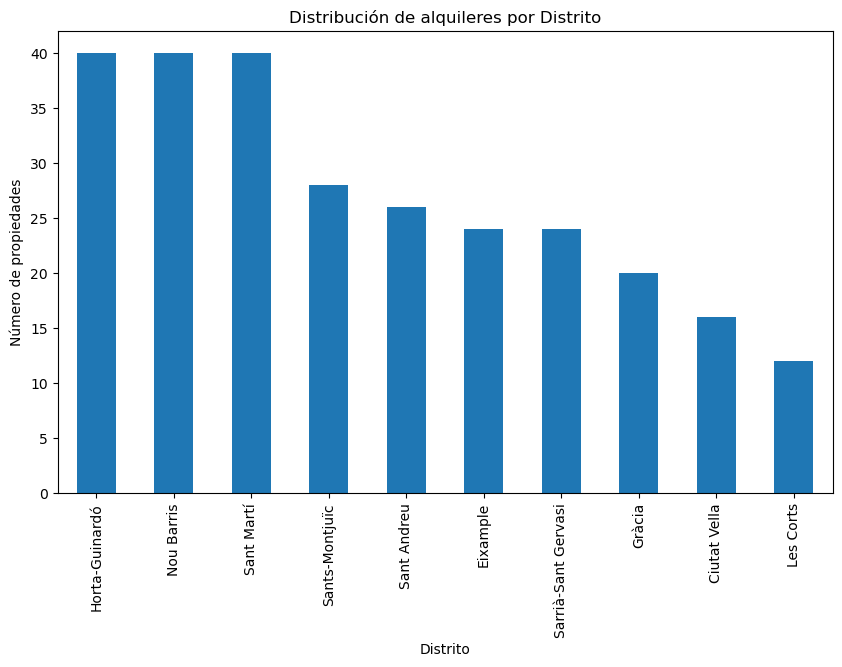

In [28]:
# Visualización variable cat. Nom Districte.

plt.figure(figsize=(10, 6))
df_final['Nom_Districte'].value_counts().plot(kind='bar')
plt.title('Distribución de alquileres por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de propiedades')

plt.savefig('alquileres_distrito.jpg')

plt.show()

# en el gráfico observamos el número de propiedades por distrito. Por ejemplo tenemos 40 
# para Horta-Guinardó, Nou Barris y San Martí.

In [70]:
#Ahora para Barri, comprobaremos antes cuantas propiedades hay por barrio

df_final.groupby('Nom_Barri').count()


# hay 4 propiedades en todos los barrios, a excepción de Baró de Viver con 2.

,Any,Trimestre,Nom_Districte,Preu_lloguer,Preu_m2,Metros_cuadrados
Nom_Barri,,,,,,
Baró de Viver,2,2,2,2,2,2
Can Baró,4,4,4,4,4,4
Canyelles,4,4,4,4,4,4
Ciutat Meridiana,4,4,4,4,4,4
Diagonal Mar i el Front Marítim del Poblenou,4,4,4,4,4,4
...,...,...,...,...,...,...
la Vila Olímpica del Poblenou,4,4,4,4,4,4
la Vila de Gràcia,4,4,4,4,4,4
les Corts,4,4,4,4,4,4


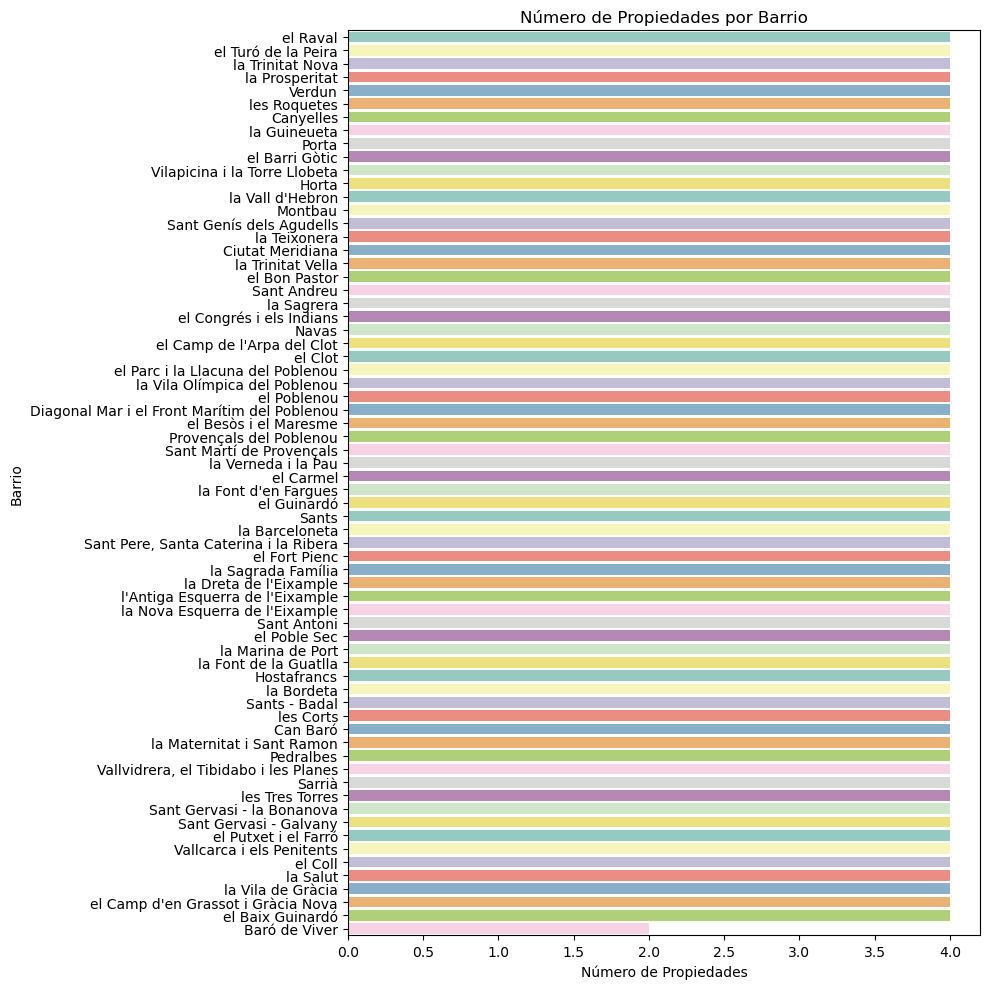

In [30]:
plt.figure(figsize=(10, 10)) 

sns.countplot(data=df_final, y='Nom_Barri', order=df_final['Nom_Barri'].value_counts().index, palette='Set3')

plt.title("Número de Propiedades por Barrio")
plt.xlabel("Número de Propiedades")
plt.ylabel("Barrio")

plt.tight_layout()

plt.savefig('propiedades_barrio.jpg') #descargamos el gráfico

plt.show()



### 1.b: Una variable numèrica (Preu)

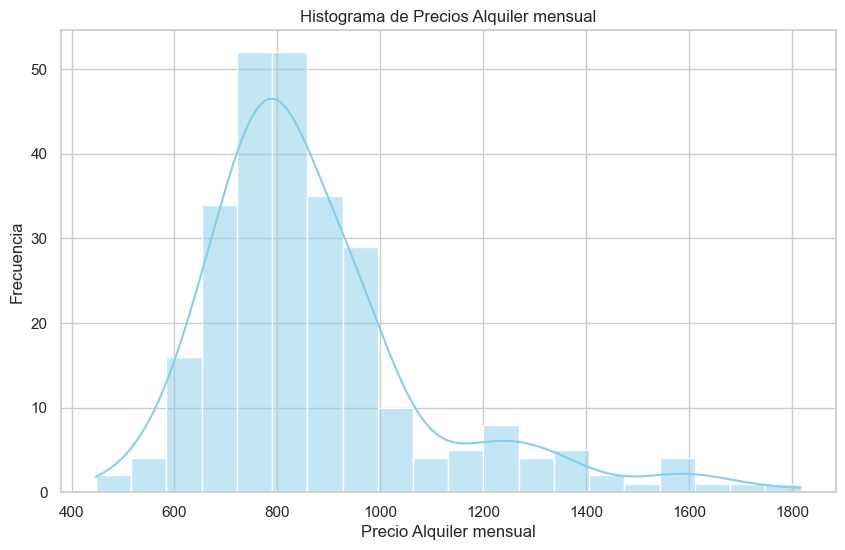

In [31]:
# Haremos un histograma para la variable precio alquiler mensual (€)
# Muestra la distribución de los precios de alquiler mensual en el dataset

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(df_final['Preu_lloguer'], bins=20, kde=True, color='skyblue')

plt.title("Histograma de Precios Alquiler mensual")
plt.xlabel("Precio Alquiler mensual")
plt.ylabel("Frecuencia")

plt.savefig('hist_p_mensual.jpg') #descarga del gráfico

plt.show()

# vemos la tendencia de donde se concentran los precios promedio
# y cuál es el valor típico del alquiler mensual, en torno a los 870 €/mes

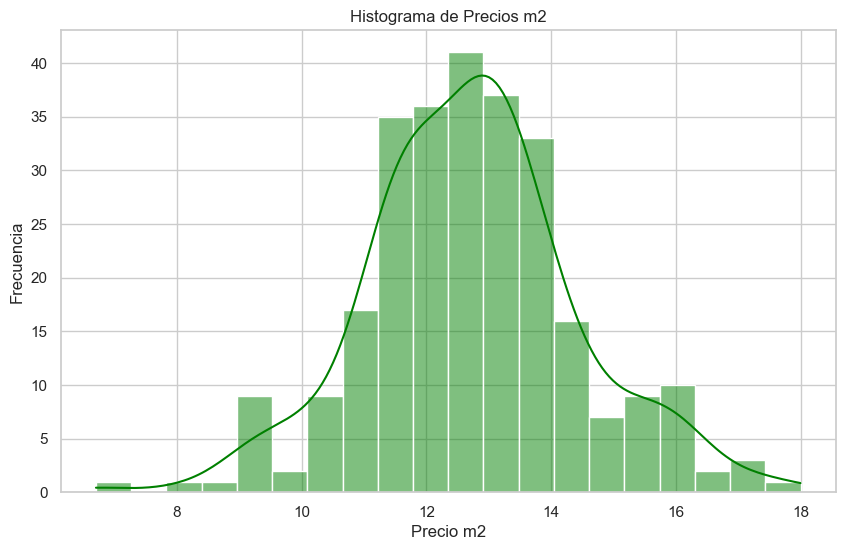

In [32]:
# Hacemos otro histograma para la variable precio €/m2


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(df_final['Preu_m2'], bins=20, kde=True, color='green')


plt.title("Histograma de Precios m2")
plt.xlabel("Precio m2")
plt.ylabel("Frecuencia")


plt.savefig('hist_p_m2.jpg') # descargamos el gráfico

plt.show()

# el precio por m2 promedio se sitúa en los 12,75 € 


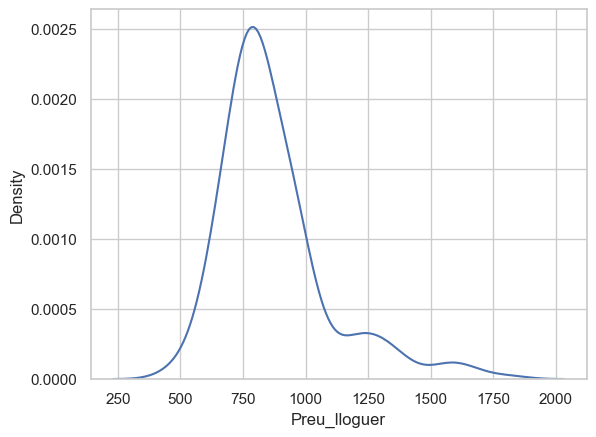

In [33]:
# Gráfico de densidad de Kernel para Preu Lloguer mensual

sns.kdeplot(df_final['Preu_lloguer'])

plt.savefig("precios_alquiler_kernel.png")

# La densidad de 0.0025 en el punto de 870 euros en este caso, 
# proporciona información sobre la concentración de datos en ese punto de
# la distribución.

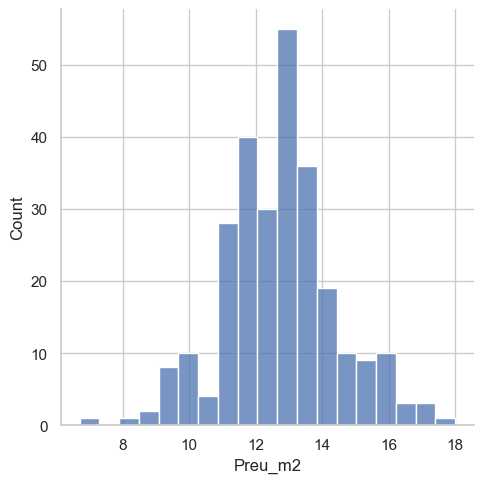

In [34]:
# ahora para el precio por m2

sns.displot(df_final['Preu_m2'])

# tenemos más de 50 propiedades a un precio medio de aprox. 13 €/m2


### 1.c: Una variable numèrica i una categòrica (Districte i Preu)

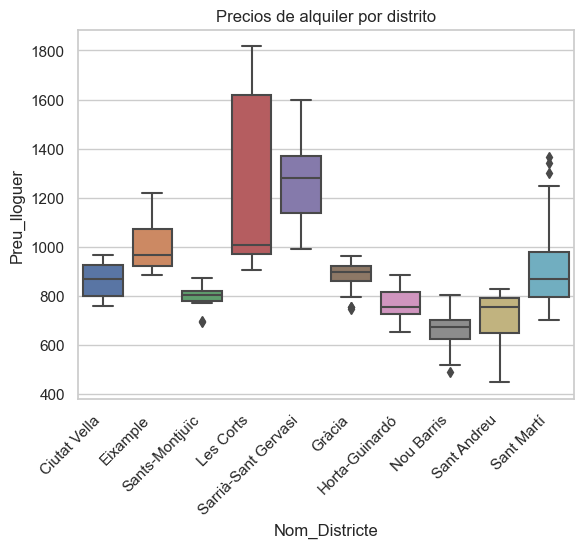

In [72]:
# Haremos gráfico boxplot para obtener visualización del precio de alquiler por distrito.


sns.boxplot( x=df_final["Nom_Districte"], y=df_final["Preu_lloguer"] )

plt.xticks(rotation=45, ha="right")

plt.title("Precios de alquiler por distrito")

plt.savefig('distrito_precio.jpg') #descarga del gráfico


plt.show()

# la raya en las cajas indica el precio de alquiler promedio. Cuanto más altas son, 
# esto indica más dispersión en los precios del distrito en cuestión.
# por ejemplo, para Les Corts tenemos un precio promedio de unos 1000 €/mes, pero que 
# puede llegar hasta los 1600 aprox., y excepcionalmente alrededor de los 1800€.
# para un distrito como Sants-Montjuic o Graciaes todo lo contrario, 
# hay menos dispersión en los precios, además de tener algún valor atípico alejado 
# de la media y de la parte inferior de la caja (con precios por debajo del promedio
# para el barrio en cuestión)



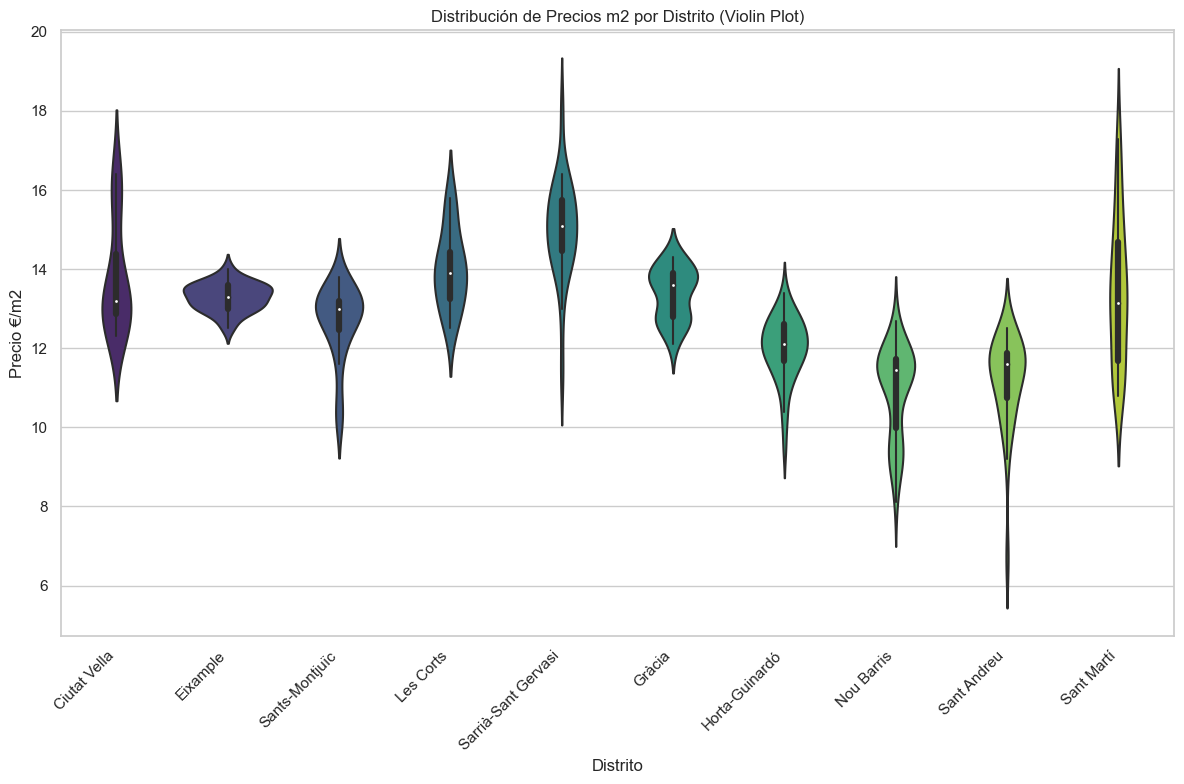

In [36]:
# en este caso haremos gráfico de violín para obrtener relación de precio por m2 y distrito.

sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x="Nom_Districte", y="Preu_m2", data=df_final, palette="viridis")


plt.title("Distribución de Precios m2 por Distrito (Violin Plot)")
plt.xlabel("Distrito")
plt.ylabel("Precio €/m2")


plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.savefig('violin_m2_dist.jpg') # descarga del gráfico

plt.show()

La gráfica visuliza los precios por m2 promedio por cada distrito. Sarrià-Sant Gervasi tiene el más alto, seguido de Sant Martí. Los distritos con el precio por m2 más bajo son Sant Andreu, Nou Barris y Horta-Guinardó. Los distritos con más disparidad respecto al precio promedio, son Ciutat Vella, Sarrià-Sant Gervasi y Sant Martí. Por el contrario, l´Eixample y Gràcia son los distritos con menos variación repecto al precio medio.

### 1.d: Dues variables numèriques (Any o Trimestre i Preu)

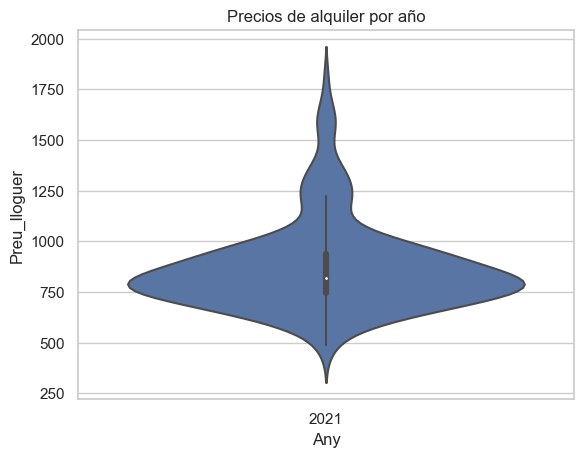

In [37]:
# gráfico de violín, precio alquiler por año (2001)

sns.violinplot(x=df_final["Any"], y=df_final["Preu_lloguer"])

plt.title("Precios de alquiler por año")

plt.savefig('preciomensual_any.jpg') # descarga del gráfico

Este gráfico en violín nos indica  el precio promedio del año 2021, punto blanco en la línea central, a partir del cual vemos que su ancho es simétrico, indicador de una distribución más equilibrada y que la media se encuentra en el centro del rango de valores .

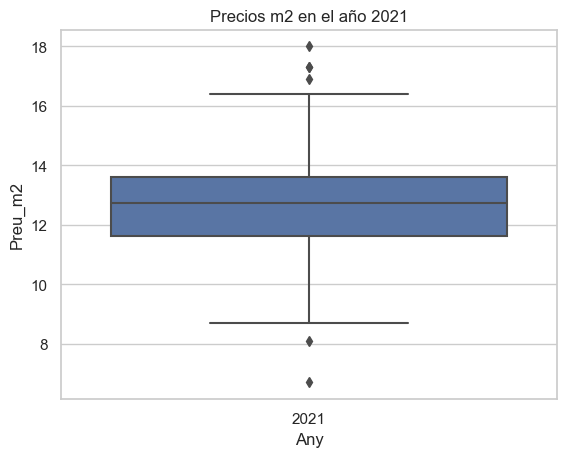

In [38]:
# ahora boxplot para precio m2 para el año 2021

sns.boxplot(x=df_final["Any"], y=df_final["Preu_m2"])

plt.title("Precios m2 en el año 2021")

plt.savefig('boxplot_m2_any.jpg')

La línea central es la mediana, que es un precio de aprox. 13 €/m2 para la ciudad de Barcelona.
Tenemos como valores atípicos, por la parte baja de aprox 8 €/m2 o inferiores (hasta 6,7 /m2). Por la parte positiva hasta los 18 €/m2, como precio máximo. 

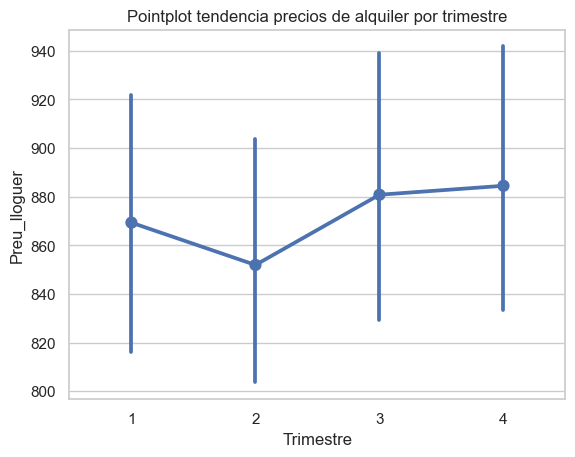

In [39]:
# poinplot precio alquiler por trimestre. Muestra la tendencia precio alquiler medio.
# vemos que es bastante parejo, no hay gran variación en los precios, pero se vé tendencia
# al alza a partir del tercer trimestre.


sns.pointplot(x=df_final["Trimestre"], y=df_final["Preu_lloguer"])

plt.title("Pointplot tendencia precios de alquiler por trimestre")

plt.savefig('precio_trim.jpg')

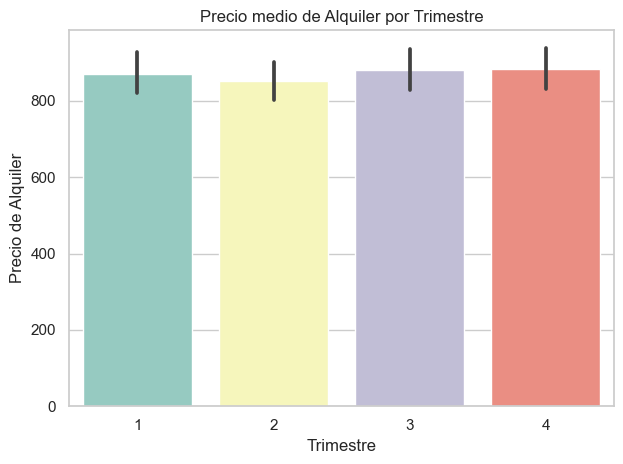

In [40]:
# Gráfico de barras precio de alquiler por trimestre. Diferente visualización
# del caso anterior, misma interpretación gráfica
# (se aprecia mejor la tendencia en el pointplot)


sns.barplot(data=df_final, x='Trimestre', y='Preu_lloguer', palette='Set3')

plt.title("Precio medio de Alquiler por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Precio de Alquiler")

plt.tight_layout()

plt.savefig('propiedades_barrio.jpg')

plt.show()

### 1.e: Tres variables (Barri o Districte, Trimestre i Preu)

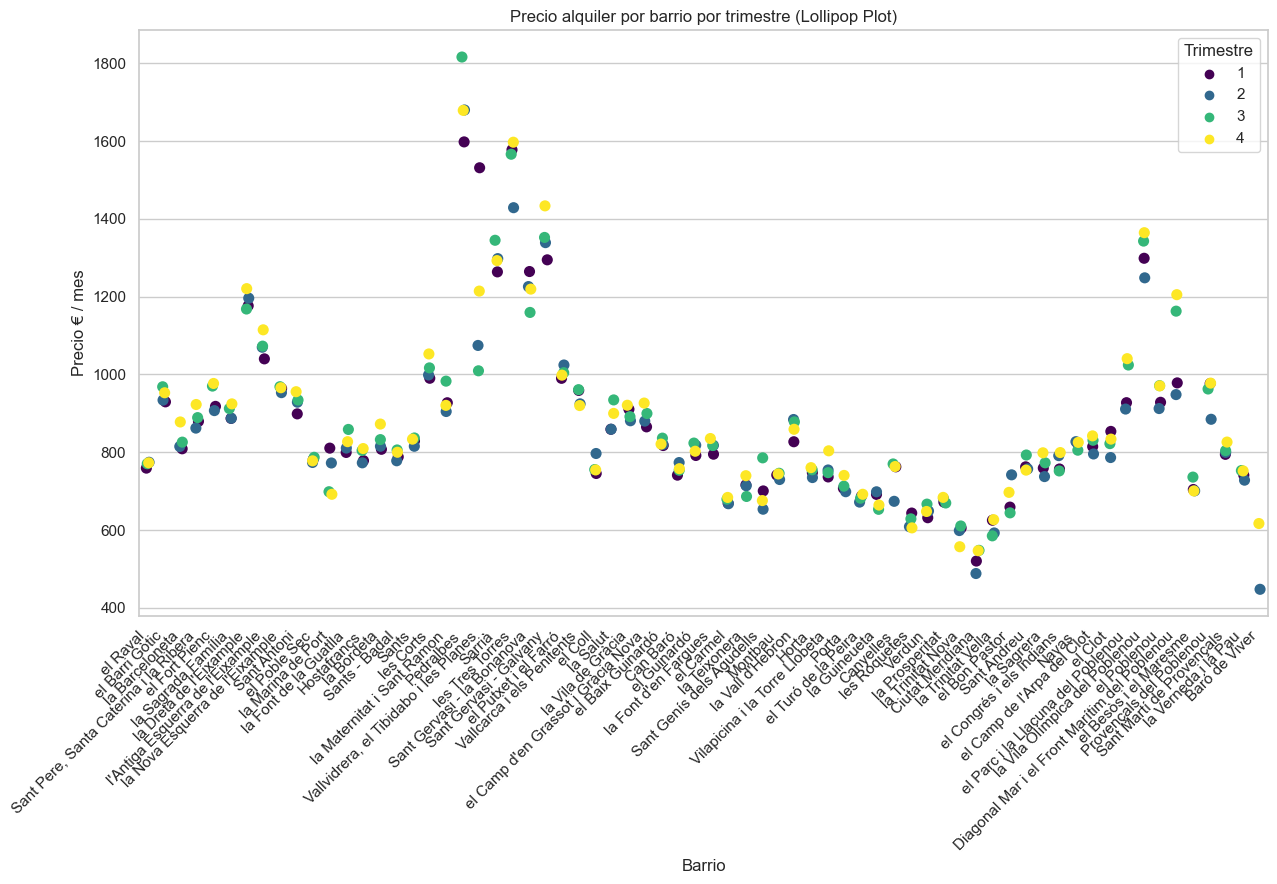

In [71]:
# gráfico lollipop barri, preu lloguer y trimestre

plt.figure(figsize=(13, 9))
lollipop_plot = sns.stripplot(x="Nom_Barri", y="Preu_lloguer", hue="Trimestre", data=df_final, size=8, palette="viridis")


plt.title("Precio alquiler por barrio por trimestre (Lollipop Plot)")
plt.xlabel("Barrio")
plt.ylabel("Precio € / mes")


plt.xticks(rotation=45, ha='right')


plt.tight_layout()

plt.savefig('lollipop.png')

plt.show()

# vemos que la tendencia general es el ligero incremento de precios medios a partir del tercer 
# trimestre, con pocas excepciones como puede ser para los casos de barrios como
# Pedralbes o el Barri Gòtic(donde el precio medio subió más el tercer trimestre que el cuarto,
# pero sin efecto sobre la tendencia del conjunto)

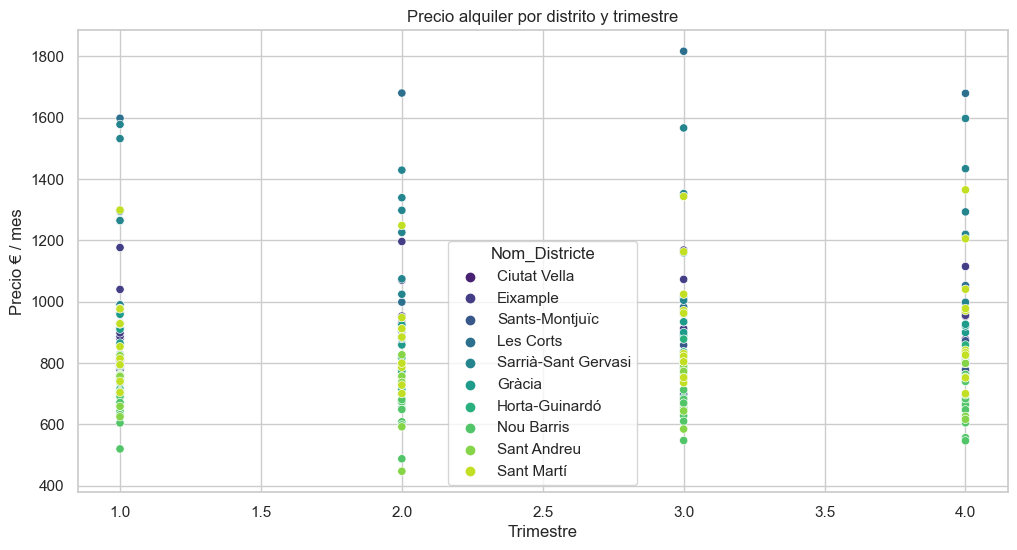

In [64]:
#Gráfico de dispersión por trimestre, precio de alquiler mensual y distrito

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x="Trimestre", y="Preu_lloguer", hue="Nom_Districte", data=df_final, palette="viridis")


plt.title("Precio alquiler por distrito y trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Precio € / mes")

plt.savefig("disp_tri_mes_dist.png")

plt.show()

# Como en el caso anterior, vemos la tendencia generalizada al alza de los precios
# a partir del tercer trimestre.


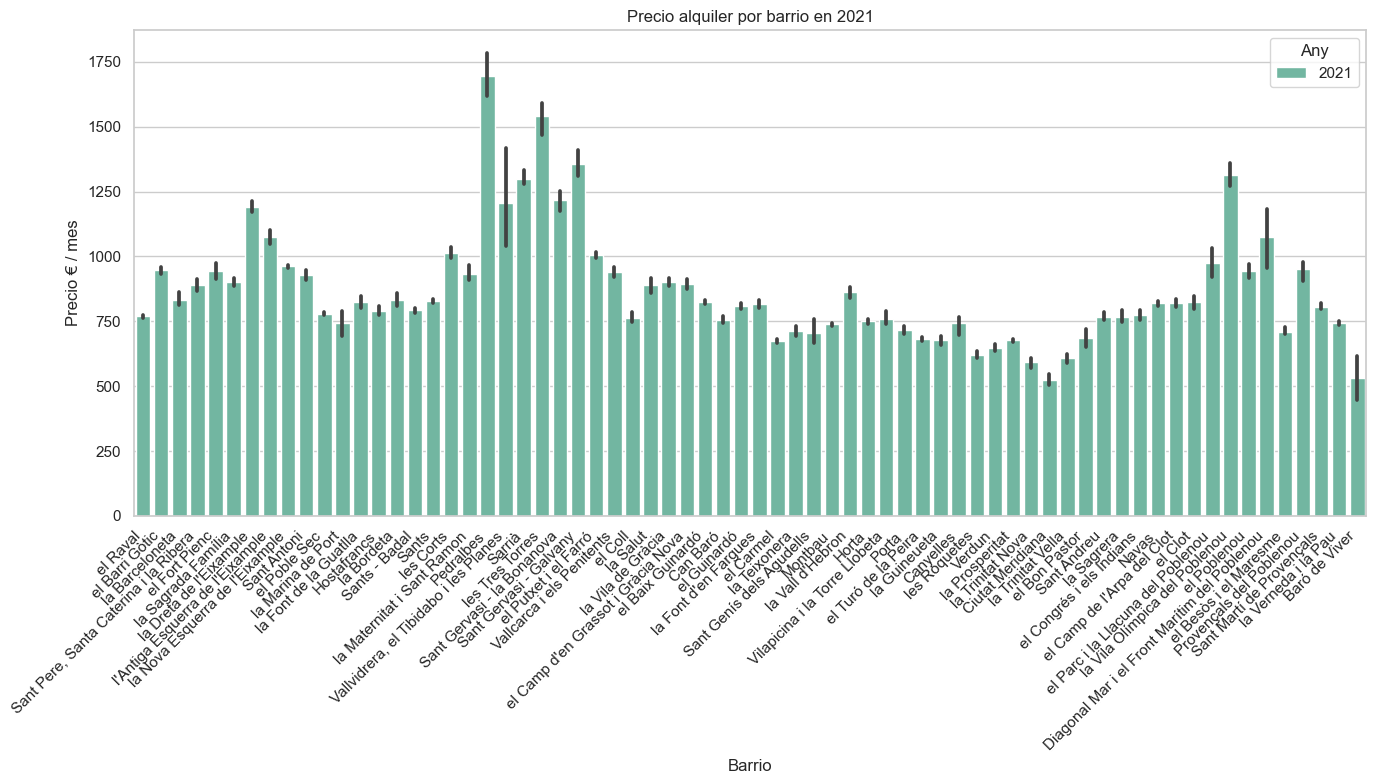

In [59]:
#Gráfico de barras por barrio, precio y año

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x="Nom_Barri", y="Preu_lloguer", hue="Any", data=df_final, palette="Set2")


plt.title("Precio alquiler por barrio en 2021")
plt.xlabel("Barrio")
plt.ylabel("Precio € / mes")


plt.xticks(rotation=45, ha='right')


plt.tight_layout()


plt.show()

# Representa estadísticamente los precios de alquiler por barrio y año (2001)
# El precio de alquiler más elevado es en el barrio de Pedralbes, 
# siendo los más bajos en Ciutat Meridiana y Baró de Viver

### Exercici 2: Exporta els gràfics com imatges o com HTML.

Los gráficos han sido exportados en el ejercicio anterior, antes de mostrar el gráfico.


### Exercici 3: Proposa alguna visualització que creguis que pot resultar interessant

In [45]:
# por ejemplo podemos obtener el promedio de m2 según el distrito

df_final.head()

,Any,Trimestre,Nom_Districte,Nom_Barri,Preu_lloguer,Preu_m2,Metros_cuadrados
0,2021,1,Ciutat Vella,el Raval,759.2,12.8,59.312500
1,2021,1,Ciutat Vella,el Barri Gòtic,929.6,12.3,75.577236
2,2021,1,Ciutat Vella,la Barceloneta,808.9,15.5,52.187097
3,2021,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3,66.120301
4,2021,1,Eixample,el Fort Pienc,918.0,12.9,71.162791


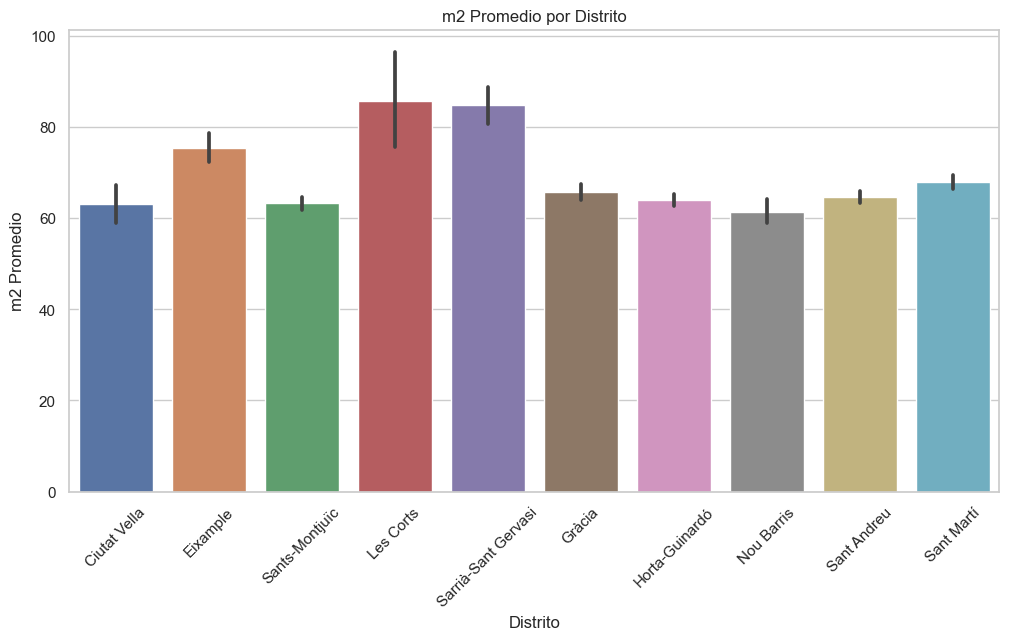

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_final, x='Nom_Districte', y='Metros_cuadrados')
plt.xticks(rotation=45)
plt.title('m2 Promedio por Distrito')
plt.xlabel('Distrito')
plt.ylabel('m2 Promedio')

plt.show()

# el promedio de m2 es similar en todos los distritos (aprox. 60 m2), 
# a excepción de Les Corts y Sant Gervasi donde se superan los 80 m2 por propiedad

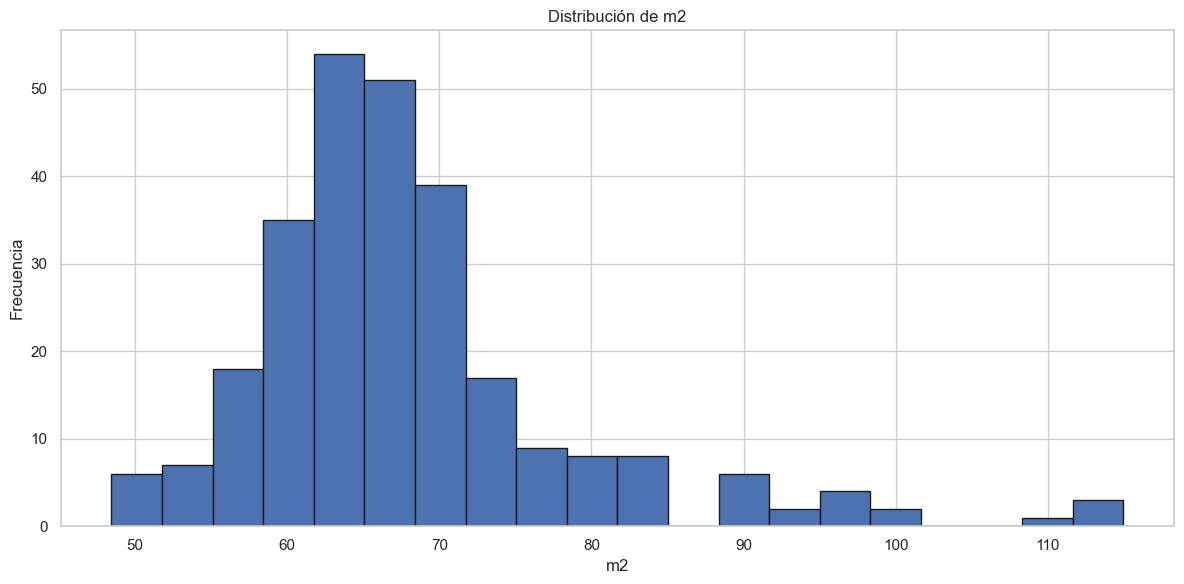

In [62]:
#histograma de superficie (m2)

plt.figure(figsize=(12, 6))
plt.hist(df_final['Metros_cuadrados'], bins=20, edgecolor='k')
plt.title('Distribución de m2')
plt.xlabel('m2')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# como en el caso anterior, observamos que la mayoría de propiedades tienen una
# superficie en el rango de 60-70m2.
# Por el contrario hay pocas propoiedades de más de 100 m2 (outliers)

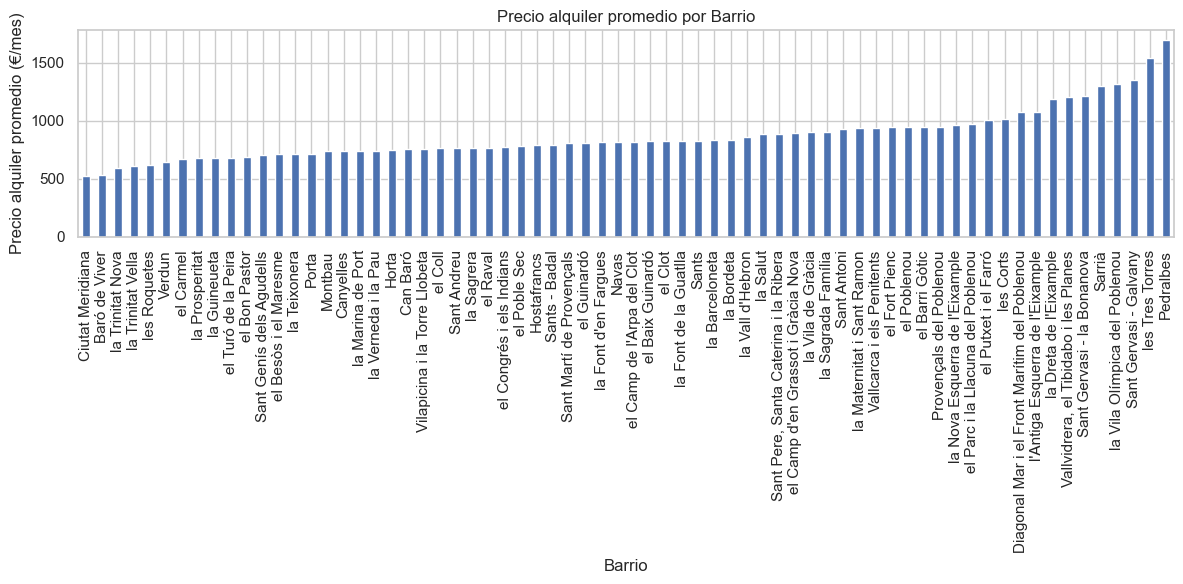

In [63]:
# visualizar el precio promedio de alquiler en cada barrio.

df_barrio = df_final.groupby('Nom_Barri')['Preu_lloguer'].mean().sort_values()
df_barrio.plot(kind='bar', figsize=(12, 6))
plt.title('Precio alquiler promedio por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio alquiler promedio (€/mes)')

plt.tight_layout()

plt.show()

# como hemos apreciado anteriormente,el precio promedio de alquiler más alto es
# en el barrio de Pedralbes (1800 € aprox), y el más bajo en Ciutat Meridiana (500€ aprox)


In [49]:
df_final.head()

,Any,Trimestre,Nom_Districte,Nom_Barri,Preu_lloguer,Preu_m2,Metros_cuadrados
0,2021,1,Ciutat Vella,el Raval,759.2,12.8,59.312500
1,2021,1,Ciutat Vella,el Barri Gòtic,929.6,12.3,75.577236
2,2021,1,Ciutat Vella,la Barceloneta,808.9,15.5,52.187097
3,2021,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3,66.120301
4,2021,1,Eixample,el Fort Pienc,918.0,12.9,71.162791


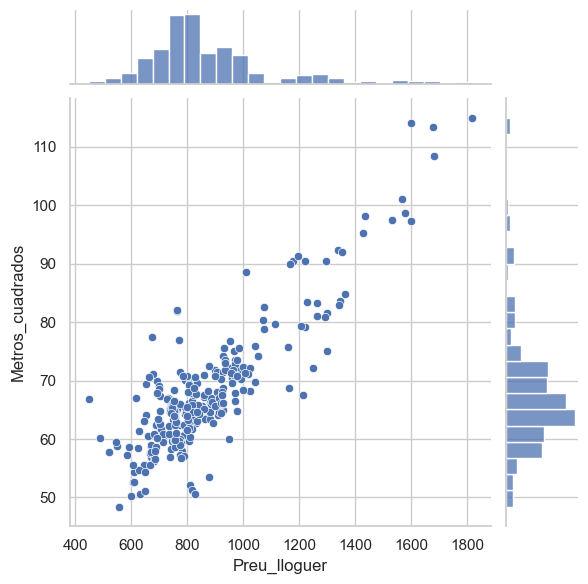

In [50]:
# joint plot entre precio alquiler mensual y superficie

sns.jointplot(x='Preu_lloguer', y='Metros_cuadrados', data=df_final)

# Combinación de un gráfico de dispersión (scatter plot) en el centro y 
# 2 histogramas (uno para cada variable) en los márgenes. Proporcionan 
# información sobre la relación entre las 2 variables (preu_lloguer y m2)
# la concentración de puntos,indican una correlación positiva
# entre el precio de alquiler y la superficie,lo que significa que a medida que 
# la superficie aumenta, el precio tiende a aumentar. Los puntos dispersos indican
# poca correlación entre precio de alquiler y superficie. 


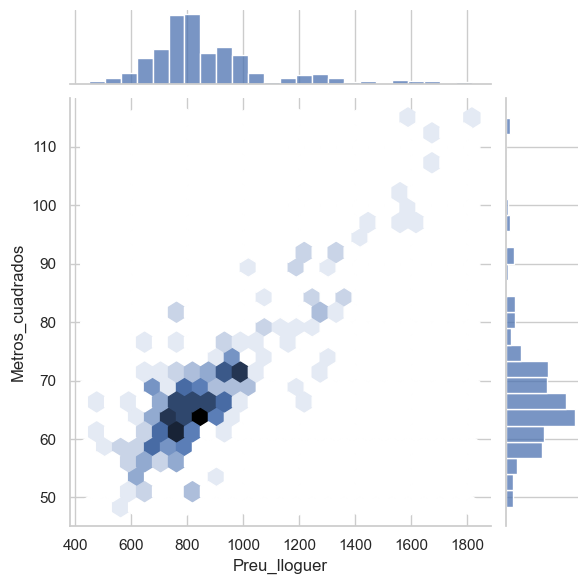

In [51]:
# la misma representación pero con visualización por puntos hexagonales

sns.jointplot(x='Preu_lloguer', y='Metros_cuadrados', data=df_final, kind='hex')


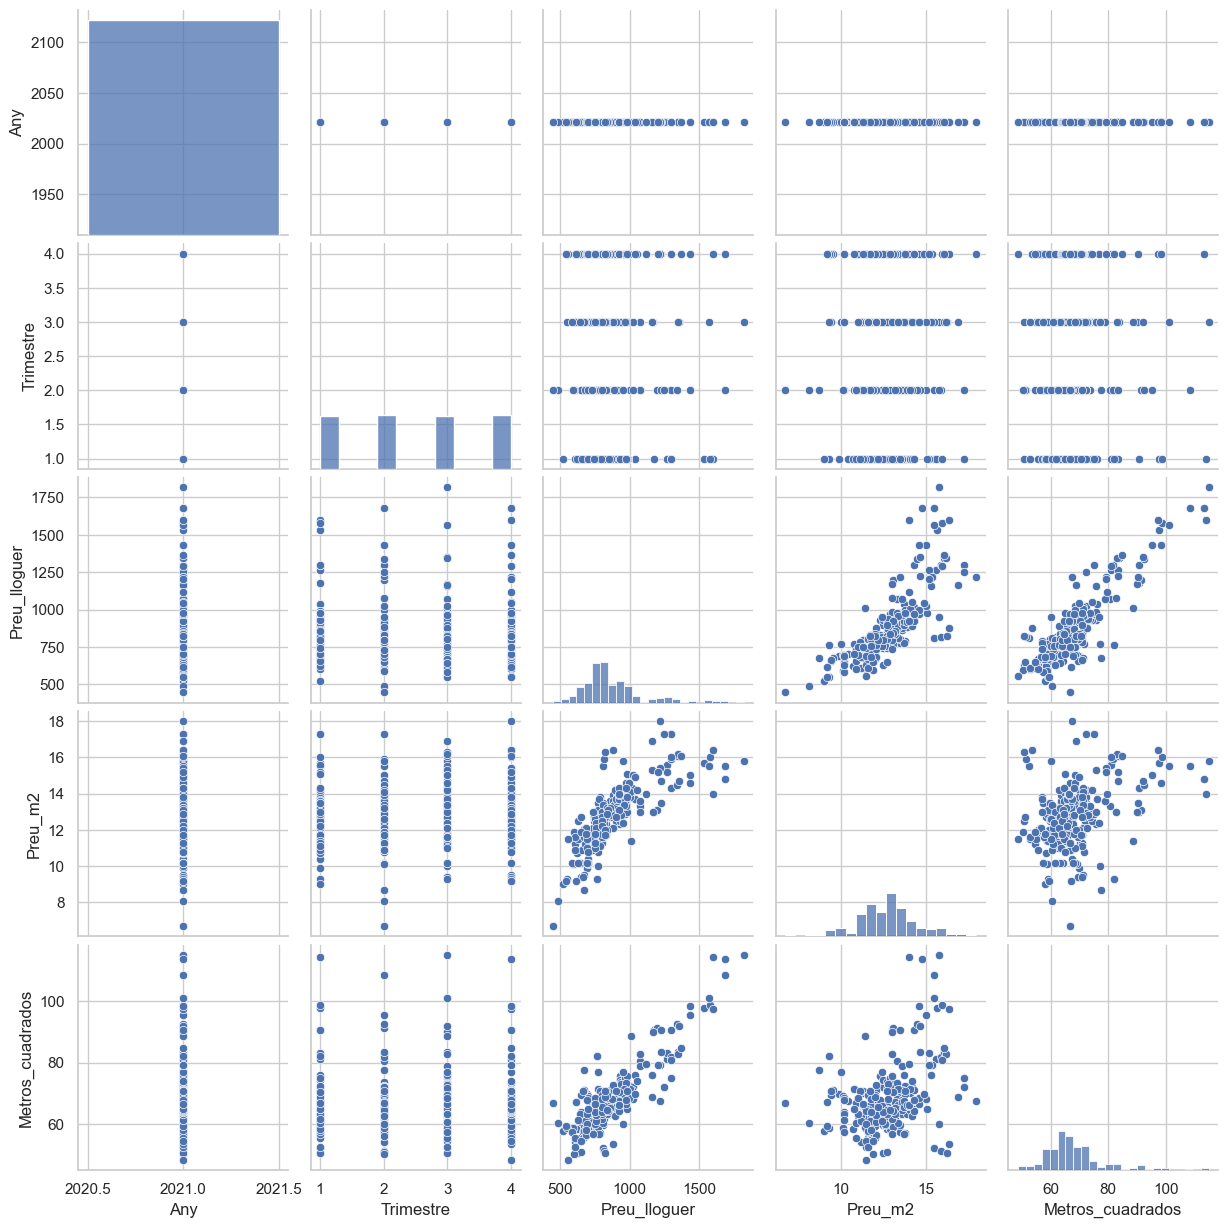

In [52]:
# gráfica pairplot, que nos ofrece la relación de las variables numéricas 
# de todo el dataframe. Podemos ver tendencias y dispersiones.
sns.pairplot(df_final)

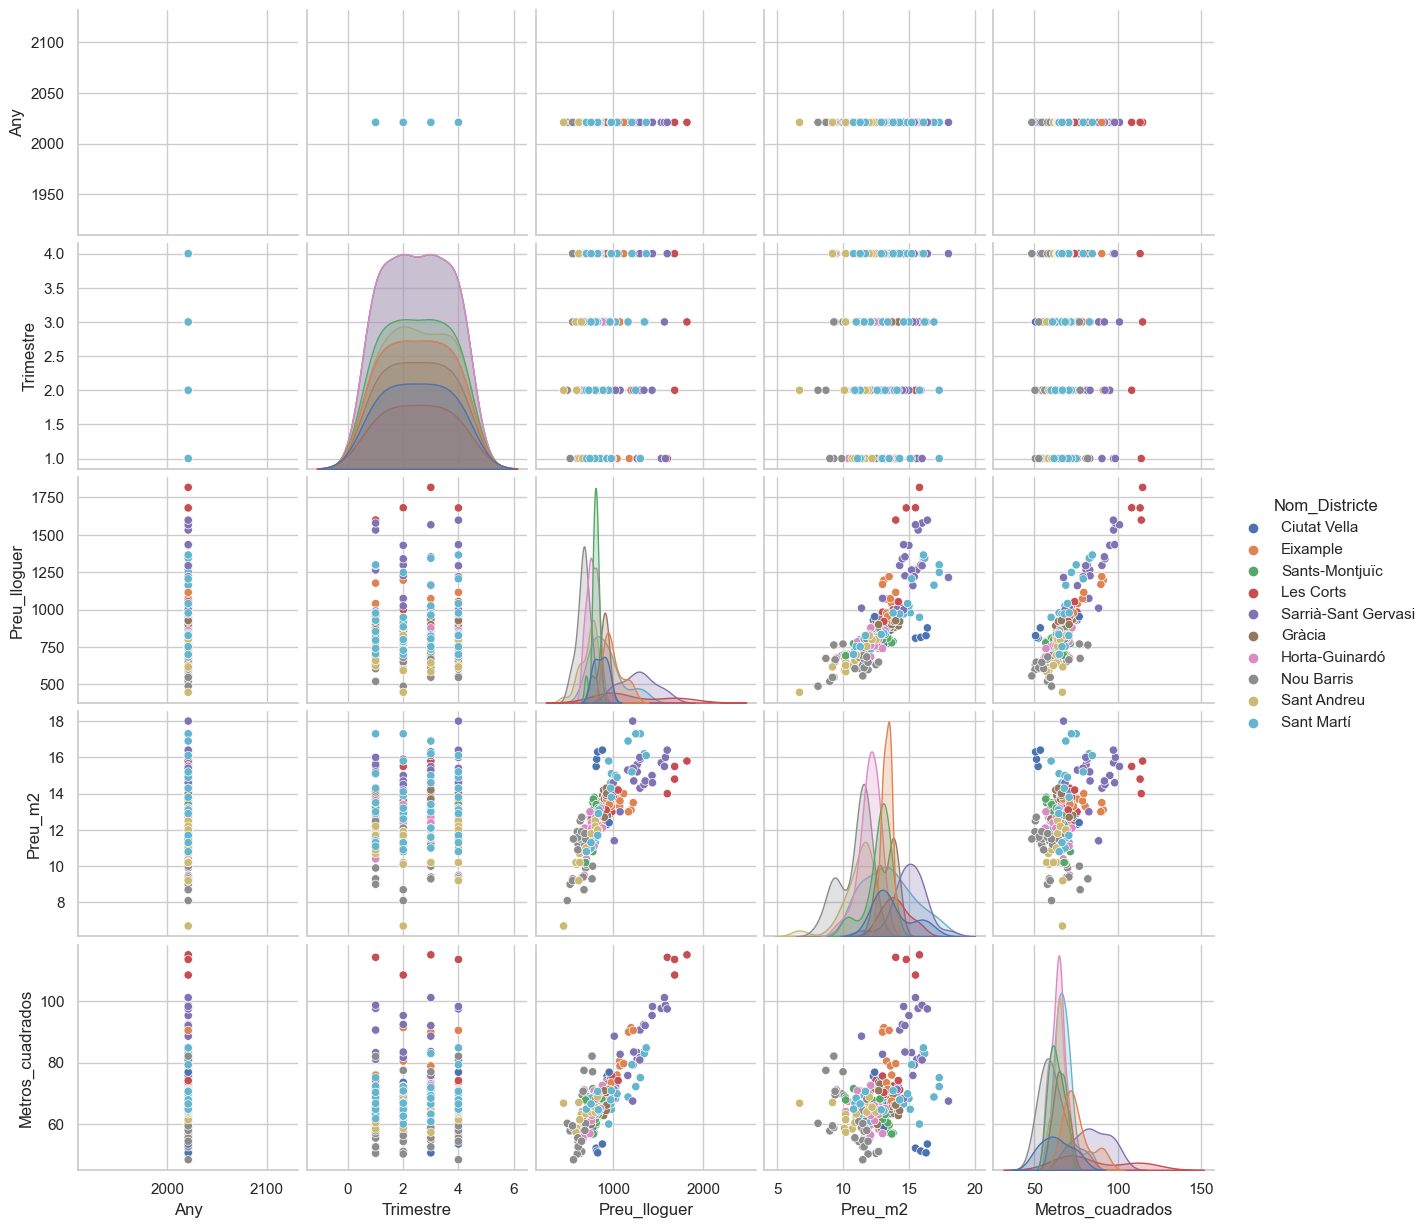

In [53]:
#pairplot de variable categórica (distrito)

sns.pairplot(df_final, hue='Nom_Districte')

# podemos ver gráficas con estadísticas de los distritos en relación al resto de 
# variables: las de más interés son las comparaciones de precios, y superficie por cada
# uno de los distritos de la ciudad de Barcelona.


/var/folders/l8/zlht1tbs0sn2g172kjlrsmfh0000gn/T/ipykernel_25013/3670242767.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(),annot=True,cmap='magma')


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Any'),
  Text(1.5, 0, 'Trimestre'),
  Text(2.5, 0, 'Preu_lloguer'),
  Text(3.5, 0, 'Preu_m2'),
  Text(4.5, 0, 'Metros_cuadrados')])

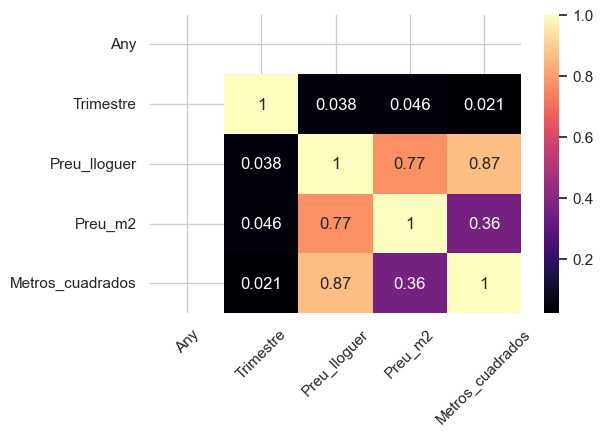

In [54]:
# Mapa de calor (heatmap) incluyendo valores correlación

sns.heatmap(df_final.corr(),annot=True,cmap='magma')
plt.tight_layout()
plt.xticks(rotation=45)

En este gráfico heatmap, cuanto más cercano sea el valor de correlación a 1, mayor será la correlación positiva entre esas dos variables. Por tanto, tenemos una alta correlación entre precio de alquiler y la superficie en m2.

Los valores cercanos a 0 indican una correlación débil o nula. De esta 
forma existe poca correlación entre los trimestres con el resto de variables(precios y m2).


         Nom_Districte  Cantidad_Pisos
0         Ciutat Vella               4
1             Eixample              20
2               Gràcia               4
3       Horta-Guinardó               3
4            Les Corts              11
5           Nou Barris               5
6          Sant Andreu               2
7           Sant Martí              11
8       Sants-Montjuïc               1
9  Sarrià-Sant Gervasi              22


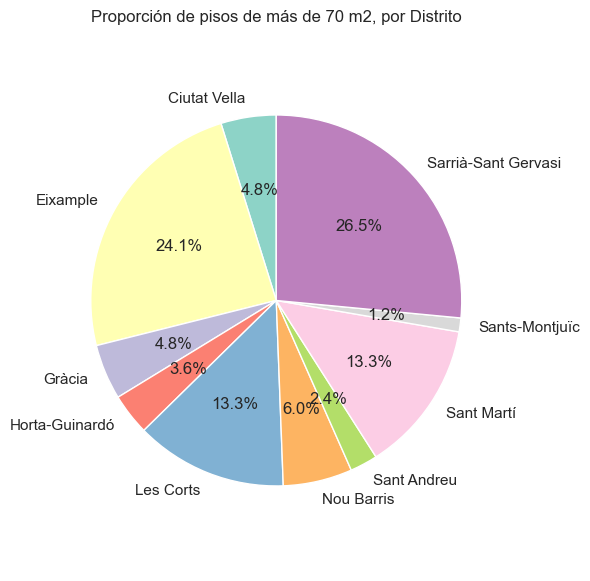

In [55]:
# podemos por ejemplo ver la proporción de pisos mayores de 70 m2 por distrito. 
# Aquí haremos un gráfico en pastel



df_mayores_70m2 = df_final[df_final['Metros_cuadrados'] > 70]


count_pisos = df_mayores_70m2.groupby('Nom_Districte').size().reset_index(name='Cantidad_Pisos')
print(count_pisos)

#Creamos un gráfico de pastel

plt.figure(figsize=(6, 6))

sns.set_palette("Set3")  
plt.pie(count_pisos['Cantidad_Pisos'], labels=count_pisos['Nom_Districte'], autopct='%1.1f%%', startangle=90)

plt.title("Proporción de pisos de más de 70 m2, por Distrito")
plt.axis('equal') 

plt.tight_layout()
plt.show()


# los distritos donde hay una mayor proporción de pisos con más de 70m2 son:
# Sarrià-Sant Gervasi con un 26,5% seguido del Eixample con un 24,1%. En última
# posición estaría Sants-Montjuic con un 1,2% de pisos de superficie superior a 70m2